## 0. Описание задачи

Был выбран датасет с музыкальными композициями. Каждая композиция имеет следующие 16 признаков: 

***artist name***, ***track name***, ***popularity***, ***danceability***, ***energy***, ***key***, ***loudness***, ***mode***, ***speechiness***, ***acousticness***, ***instrumentalness***, ***liveness***, ***valence***, ***tempo***, ***duration in milliseconds***, ***time_signature***.

Требуется научиться предсказывать жанр музыкальной композиции исходя из значений вышеперечисленных признаков.
Жанр может принимать одно из следующих значений:

***Acoustic/Folk (0)*** ***Alt_Music (1)***, ***Blues (2)***, ***Bollywood (3)***, ***Country (4)***, ***HipHop (5)***, ***Indie_Alt (6)***, ***Instrumental (7)***, ***Metal (8)***, ***Pop (9)***, ***Rock (10)***.

Помимо 16 признаков таблица с данными содержит столбец `'Class'`. где для каждой музкальной композиции отмечено к какому жанру она относится.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                 # Алгоритмы машинного обучения
from sklearn import preprocessing

## 1. Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/VladislavLap/ML/main/train.csv"
data = pd.read_csv(url)

In [3]:
data.shape

(17996, 17)

In [4]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
data.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [6]:
data.index

RangeIndex(start=0, stop=17996, step=1)

## 4. Обработка категориальных признаков

Столбцы `'key'`, `'mode'`, `'time_signature'` и `'Class'` содержат категориальные значения. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [7]:
data['key']=data['key'].astype('category')
data['key'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], ordered=False)

In [8]:
data['mode']=data['mode'].astype('category')
data['mode'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
data['time_signature']=data['time_signature'].astype('category')
data['time_signature'].dtype

CategoricalDtype(categories=[1, 3, 4, 5], ordered=False)

In [10]:
data['Class']=data['Class'].astype('category')
data['Class'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

## 2. Визуализация и вычисление основных характеристик

Получим сводную информацию о признаках

In [11]:
data.describe()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
count,17568.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04
mean,44.512124,0.543433,0.662777,-7.910660,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05
std,17.426928,0.166268,0.235373,4.049151,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05
min,1.000000,0.059600,0.000020,-39.952000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01
25%,33.000000,0.432000,0.509000,-9.538000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05
50%,44.000000,0.545000,0.700000,-7.016000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05
75%,56.000000,0.659000,0.860000,-5.189000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05
max,100.000000,0.989000,1.000000,1.355000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Получим информацию о категориальных признаках:

In [12]:
data.describe(include=['category'])

,key,mode,time_signature,Class
count,15982.0,17996,17996,17996
unique,11.0,2,4,11
top,7.0,1,4,10
freq,2097.0,11459,16451,4949


Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика. Поэтому изобразим только  1000  случайных точек:

In [13]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

Построим все возможные диаграммы рассеивания для каждой пары переменных:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


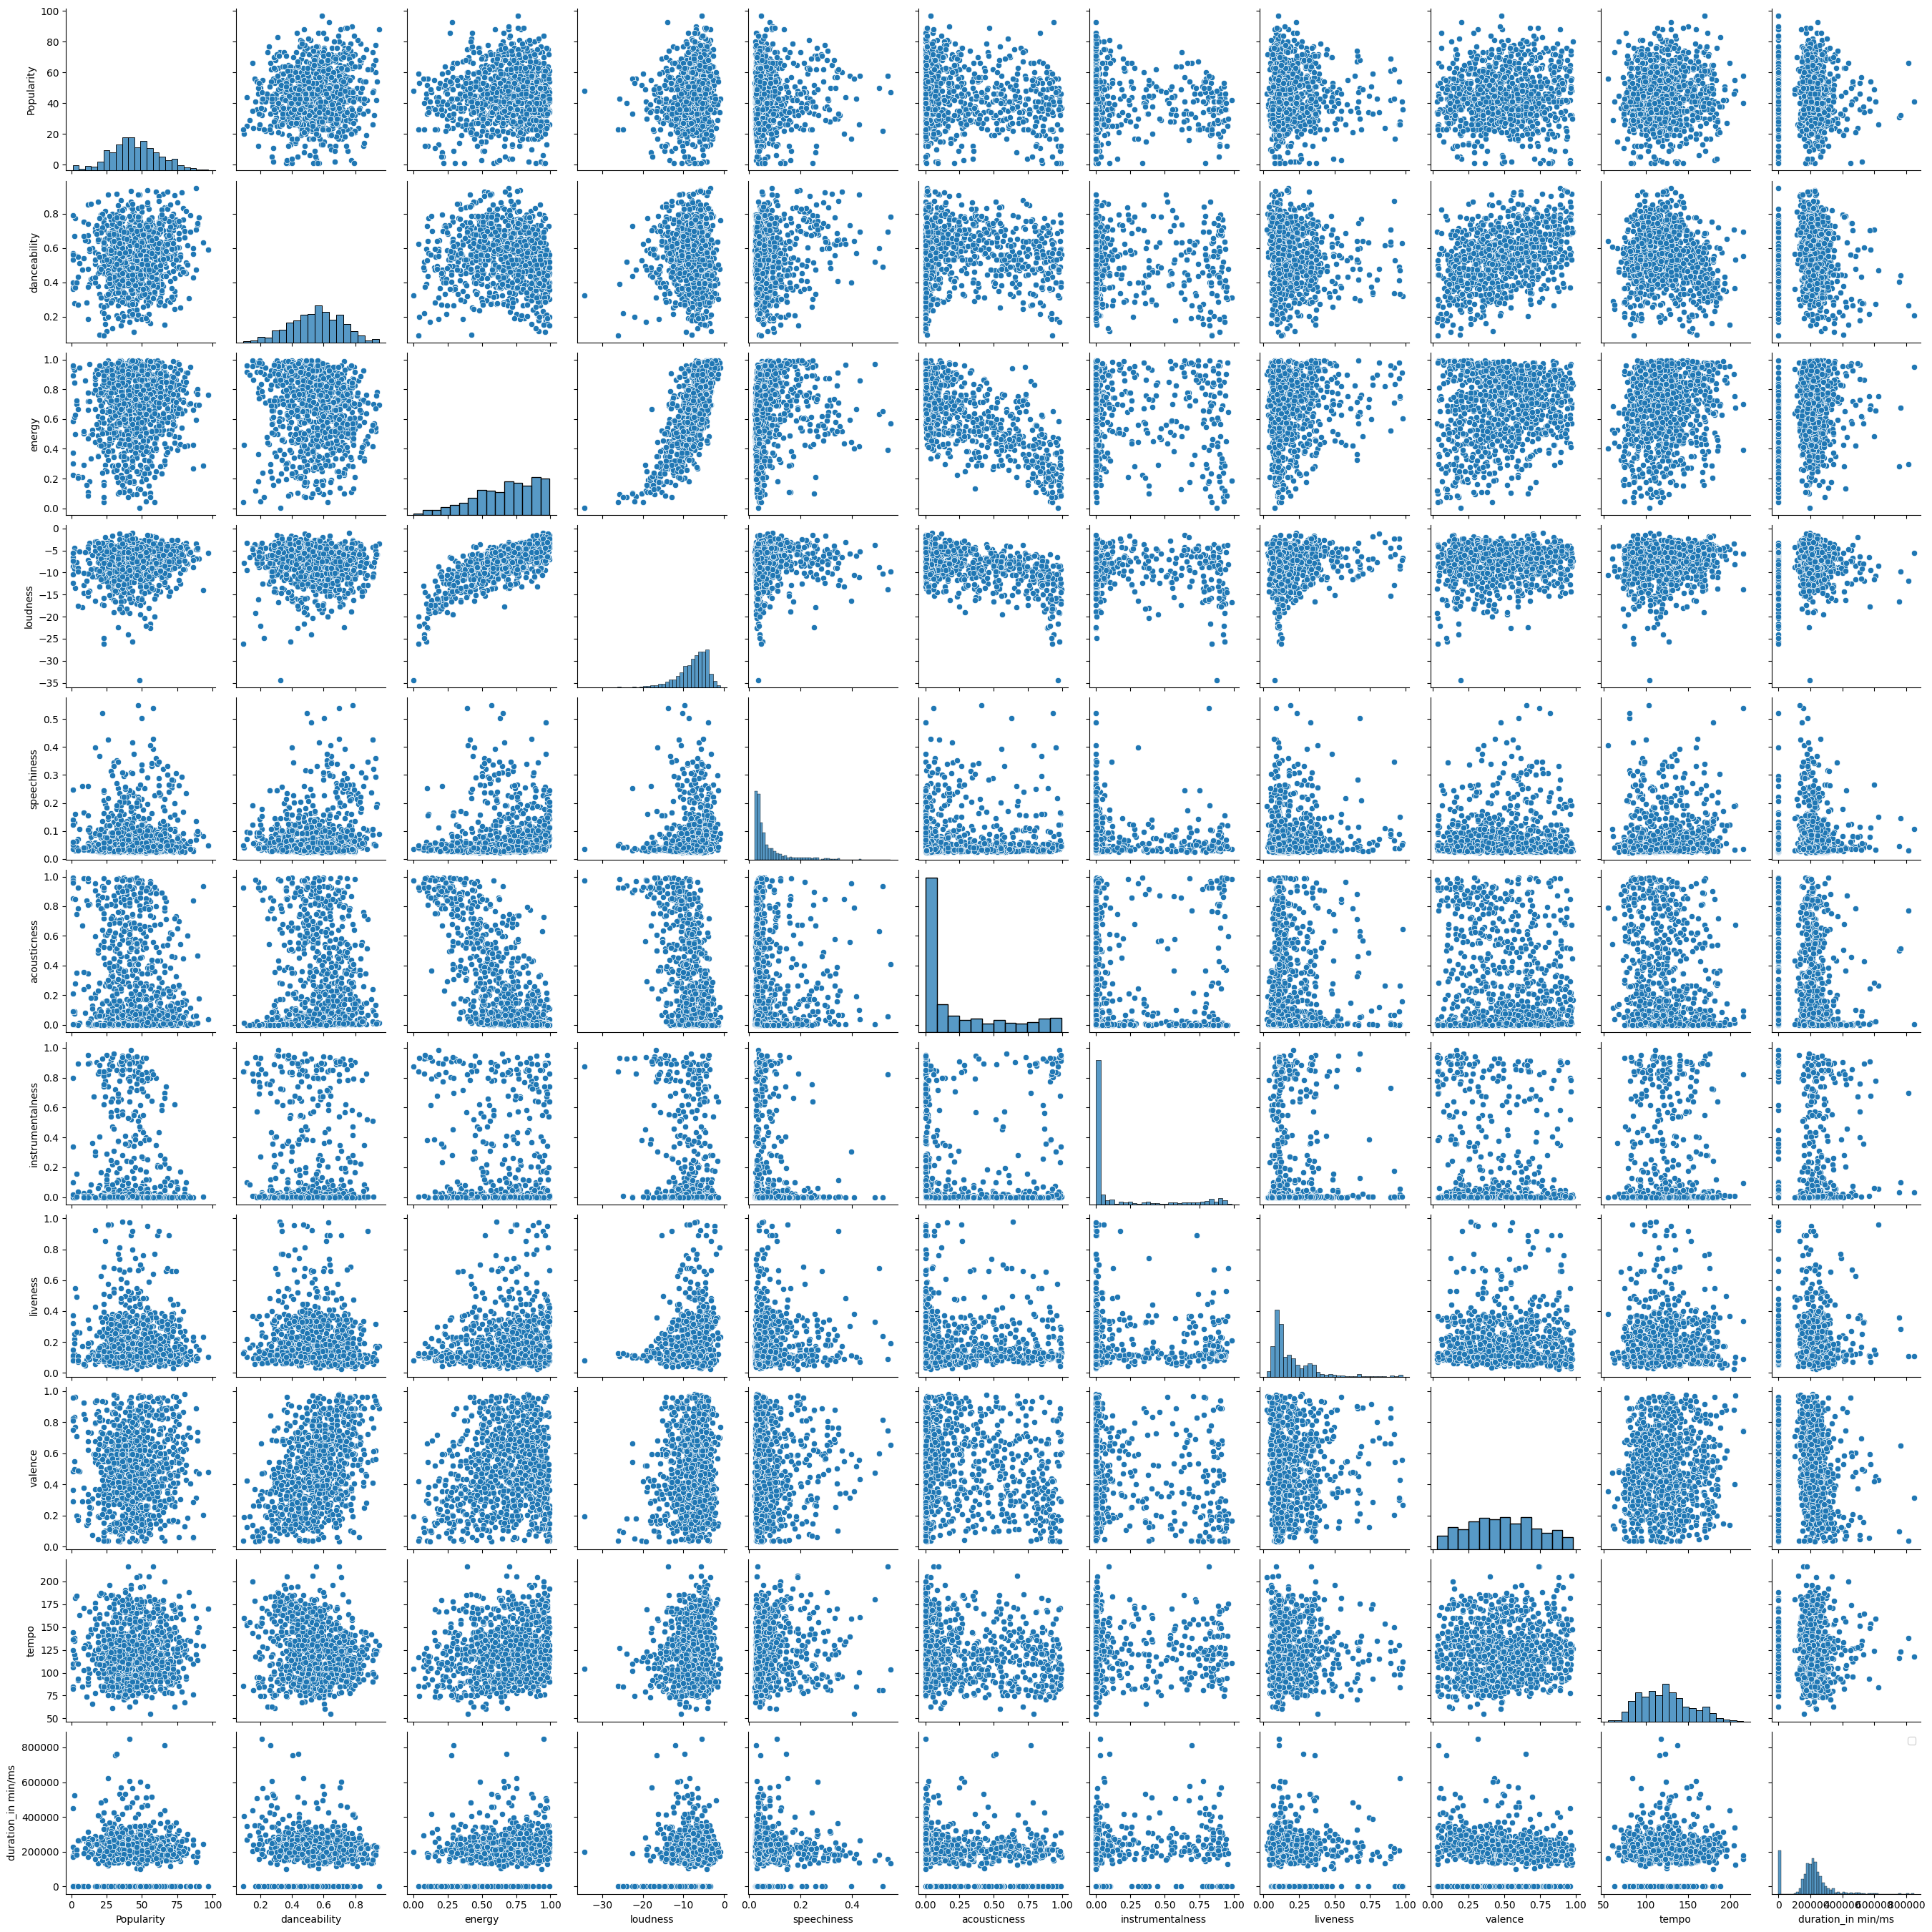

In [14]:
sns.pairplot(data.iloc[random_subset], diag_kind='hist')
plt.legend()

Наиболее интересным графиком здесь является график зависимости loudness от energy. Отрисуем его ещё раз.

<AxesSubplot: xlabel='energy', ylabel='loudness'>

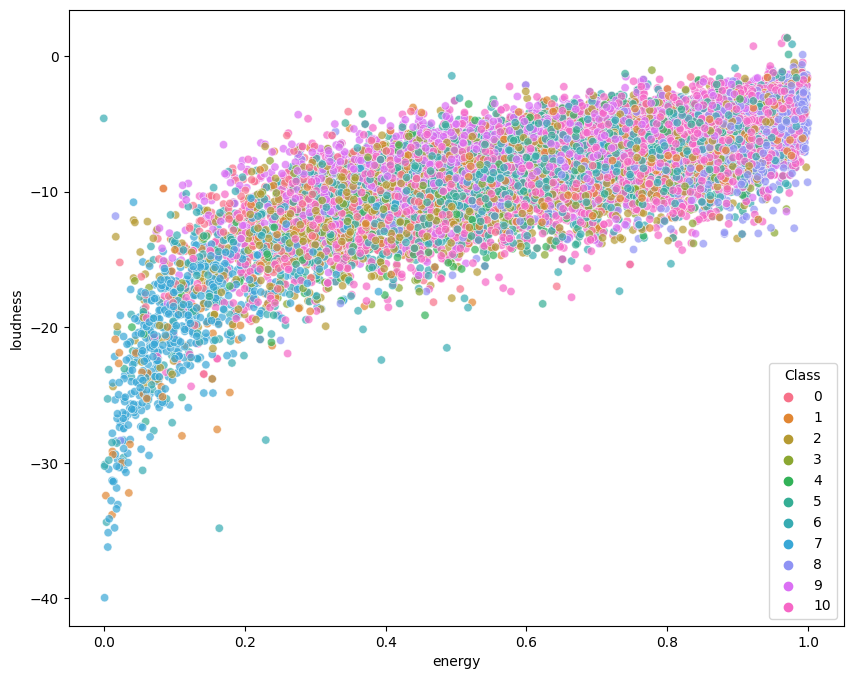

In [15]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='energy', y='loudness', hue='Class', data=data, alpha=0.7)

Явно видна корреляция этих двух признаков. Чем больше энергия музыкальной композиции, тем выше её громкость. Также видно, что наиболее тёмные точки, соответсвующие значениям 8-10 в основном находятся в правом верхнем углу, а значит музыкальные композиции жанров "Metal", "Pop", "Rock" как правило громкие и энергичные.

Построим гистограмму для стобца `'Class'`, чтобы выяснить музыкальных композиций каких жанров больше в нашем датасете.

<AxesSubplot: xlabel='Class', ylabel='Count'>

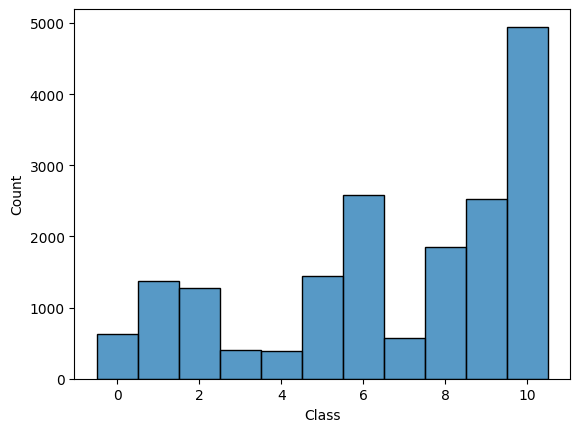

In [16]:
sns.histplot(data['Class'])

Большинство музыкальных композиций в данном датасете соотвествует жанру "Rock". На втором месте находится жанр "Indie_Alt". Тройку лидеров замыкает жанр "Pop".

Вычислим матрицу корреляции для количественных признаков:

In [17]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
Popularity,1.000000,0.167213,0.051538,0.124915,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118
danceability,0.167213,1.000000,-0.093838,0.059723,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624
energy,0.051538,-0.093838,1.000000,0.767869,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768
loudness,0.124915,0.059723,0.767869,1.000000,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010
speechiness,0.031664,0.199042,0.125427,0.096027,1.000000,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044
acousticness,-0.125410,0.009055,-0.745963,-0.612824,-0.086648,1.000000,0.174139,-0.111393,-0.122547,-0.168318,-0.322583
instrumentalness,-0.167661,-0.200752,-0.180276,-0.343672,-0.067632,0.174139,1.000000,-0.047189,-0.228144,-0.038586,-0.004551
liveness,-0.072298,-0.109485,0.195634,0.112022,0.070406,-0.111393,-0.047189,1.000000,0.021076,0.033515,0.053885
valence,0.054824,0.444548,0.222998,0.181086,0.053885,-0.122547,-0.228144,0.021076,1.000000,0.051128,-0.097126
tempo,-0.006050,-0.183527,0.210224,0.164272,0.048948,-0.168318,-0.038586,0.033515,0.051128,1.000000,0.045133


Удобно использовать визуальный образ этой матрицы.

<AxesSubplot: >

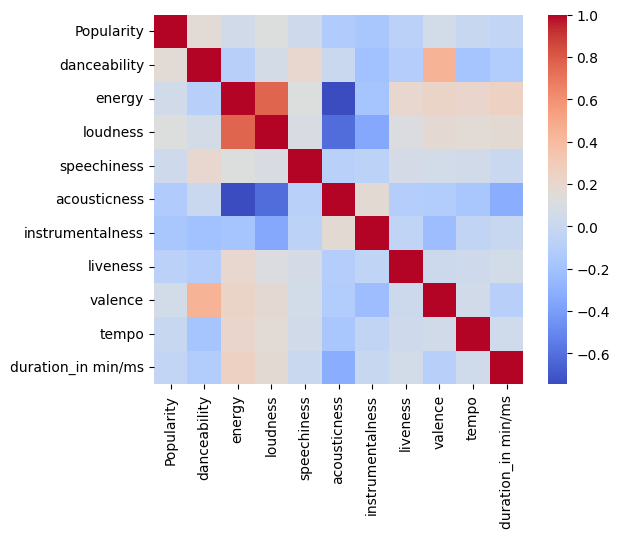

In [18]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Выведем коэффициенты корреляции, большие значения 0.5:

In [19]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

energy  loudness    0.767869
dtype: float64

Данную корреляцию признаков мы наблюдали ранее на графике. Такая связь кажется вполне логичной и объяснимой.

Выведем коэффициенты корреляции, меньшие значения -0.5:

In [20]:
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack().sort_values(ascending=False)

loudness  acousticness   -0.612824
energy    acousticness   -0.745963
dtype: float64

Такую корреляцию не сложно проинтерпретировать. Чем больше энергии и чем громче музыкальная композиция, тем меньше в ней акустического наполнения.

Выведем значений корреляционой матрицы, которые близки к нулю.

In [21]:
corr_mat.where(np.triu(np.abs(corr_mat) < 0.1, k=1)).stack().sort_values(ascending=False)

loudness          speechiness           0.096027
speechiness       liveness              0.070406
danceability      loudness              0.059723
Popularity        valence               0.054824
liveness          duration_in min/ms    0.053885
speechiness       valence               0.053885
Popularity        energy                0.051538
valence           tempo                 0.051128
speechiness       tempo                 0.048948
tempo             duration_in min/ms    0.045133
liveness          tempo                 0.033515
Popularity        speechiness           0.031664
liveness          valence               0.021076
danceability      acousticness          0.009055
speechiness       duration_in min/ms    0.005044
instrumentalness  duration_in min/ms   -0.004551
Popularity        tempo                -0.006050
                  duration_in min/ms   -0.031118
instrumentalness  tempo                -0.038586
                  liveness             -0.047189
speechiness       in

Видно, что таких значений достаточно большое количество.

Посмотрим на категориальные признаки. Для этого построим для них гистограммы.

<AxesSubplot: xlabel='key', ylabel='count'>

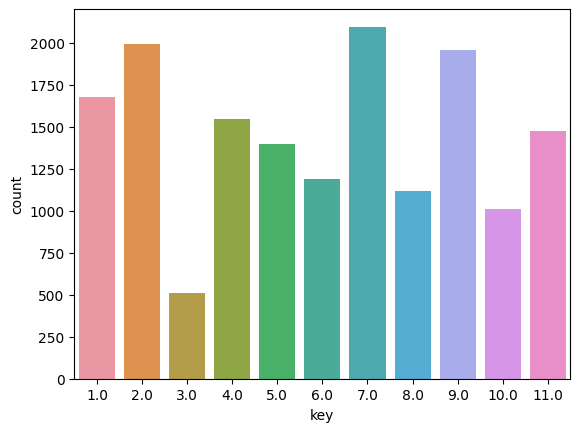

In [22]:
sns.countplot(x='key', data=data)

<AxesSubplot: xlabel='mode', ylabel='count'>

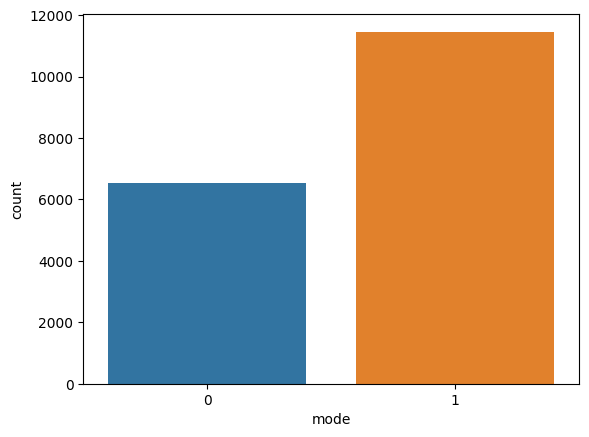

In [23]:
sns.countplot(x='mode', data=data)

<AxesSubplot: xlabel='time_signature', ylabel='count'>

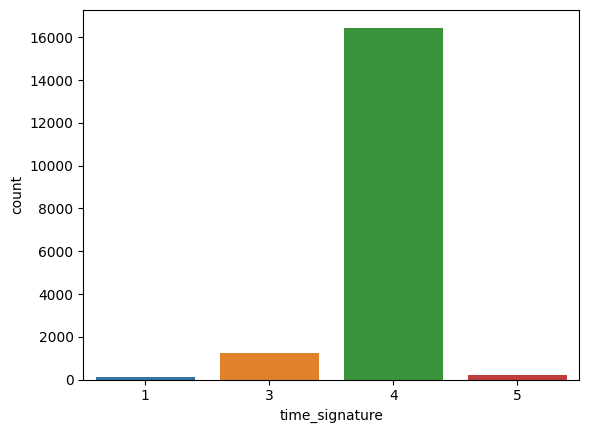

In [24]:
sns.countplot(x='time_signature', data=data)

Посмотрим как взаимосвязаны между собой признаки key и mode

<AxesSubplot: xlabel='key', ylabel='count'>

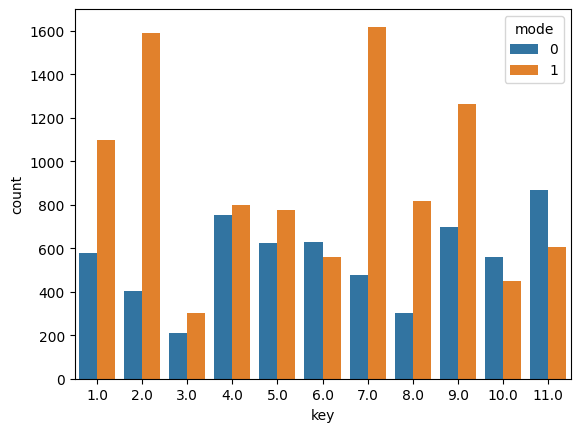

In [25]:
sns.countplot(x='key', hue='mode', data=data)

Обратим внимание на то что, в основном в рамках одного ключа больше записей с признаком mode равным 1. Также заметим, что больше половины записей с ключом 2 и 7 имею  признак mode равный 1.

Посмотрим как взаимосвязаны между собой признаки time_signature и mode

<AxesSubplot: xlabel='time_signature', ylabel='count'>

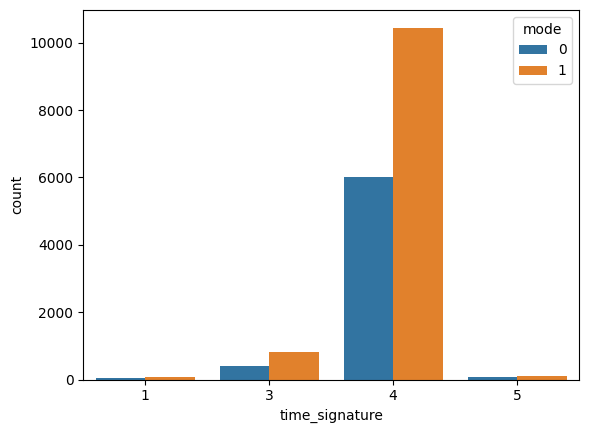

In [26]:
sns.countplot(x='time_signature', hue='mode', data=data)

Во-первых, заметим, что в большинстве случаев признак time_signature у наших объектов принимает значение либо 3 либо 4. Значит музыкальные композиции в основном не очень длинные и в тоже время не очень короткие. Во-вторых, в расках каждого значения признака time_signature большую долю составляют записи с признаком mode равным 1.

## 3. Заполнение пропущенных значений

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [27]:
data.isna().sum()  

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [28]:
data.fillna(data.median(axis = 0, numeric_only=True), axis=0 , inplace=True)

In [29]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [30]:
data['key'].fillna(data['key'].mode().iloc[0], inplace=True)

In [31]:
data.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

## Бинаризация и нормализация

Подготовим данные для дальнейшего применения к ним алгоритов машинного обучения. 

Удалим столбцы `'Artist Name'` и `'Track Name'` 

In [32]:
data = data.drop(['Artist Name'], axis=1)
data = data.drop(['Track Name'], axis=1)

In [33]:
data

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


### 5.1 Бинаризация  номинальных признаков

Закодируем номинальные признаки с помощью числовых признаков.

Бинарный признак `'modes'` заменим на числовой

In [34]:
data['mode'] = pd.factorize(data['mode'])[0]

In [35]:
data.dtypes

Popularity             float64
danceability           float64
energy                 float64
key                   category
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
duration_in min/ms     float64
time_signature        category
Class                 category
dtype: object

К признакам `'key'` и `'time_signature'`применим метод *бинаризации*

In [36]:
data

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,0,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,1,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,1,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,1,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,1,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,1,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [37]:
key_dummies = pd.get_dummies(data['key'], prefix='key')
key_dummies.head()

,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0


In [38]:
time_signature_dummies = pd.get_dummies(data['time_signature'], prefix='time_signature')
time_signature_dummies.head()

,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Добавим эти dummy-столбцы к таблице и удалим столбцы `'key'` и  `'time_signature'`:

In [39]:
data = pd.concat((data, key_dummies, time_signature_dummies), axis=1)
data = data.drop(['key'], axis=1)
data = data.drop(['time_signature'], axis=1)
data.head()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,60.0,0.854,0.564,-4.964,0,0.0485,0.017100,0.003910,0.0849,0.8990,...,0,0,0,0,0,0,0,0,1,0
1,54.0,0.382,0.814,-7.230,0,0.0406,0.001100,0.004010,0.1010,0.5690,...,0,0,0,0,0,0,0,0,1,0
2,35.0,0.434,0.614,-8.334,0,0.0525,0.486000,0.000196,0.3940,0.7870,...,1,0,0,0,0,0,0,0,1,0
3,66.0,0.853,0.597,-6.528,1,0.0555,0.021200,0.003910,0.1220,0.5690,...,0,0,0,0,1,0,0,0,1,0
4,53.0,0.167,0.975,-4.279,0,0.2160,0.000169,0.016100,0.1720,0.0918,...,0,0,0,0,0,0,0,0,1,0


Поменяем тип даных столбца `'Class'` на числовой

In [40]:
data['Class']=data['Class'].astype('int')
data['Class'].dtype

dtype('int64')

In [41]:
y = data['Class']
y

0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: int64

### 5.2 Нормализация количественных признаков

Нормализуем количественные признаки посредством применения к ним метода стандартизации

In [42]:
data_stand = (data - data.mean(axis = 0, numeric_only=True))/data.std(axis = 0)
data_stand.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,...,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04
mean,-5.113096e-17,-4.935421e-16,1.883357e-16,2.037342e-16,5.725089e-17,-8.844275e-17,-4.422137e-17,-1.539851e-17,7.896674e-17,-1.437195e-16,...,1.085793e-17,-6.514756e-17,-3.474537e-17,4.935421e-19,-6.870106e-17,-1.302951e-17,-2.033394e-17,1.875460e-18,1.156863e-16,-1.618818e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.526333e+00,-2.909952e+00,-2.815766e+00,-7.913101e+00,-7.552728e-01,-6.844902e-01,-7.954154e-01,-4.924651e-01,-1.157389e+00,-1.948034e+00,...,-2.660904e-01,-5.441125e-01,-2.574870e-01,-3.496973e-01,-2.438389e-01,-2.989001e-01,-7.984217e-02,-2.706116e-01,-3.263021e+00,-1.068099e-01
25%,-6.678787e-01,-6.702005e-01,-6.533311e-01,-4.018967e-01,-7.552728e-01,-5.373189e-01,-7.815727e-01,-4.913988e-01,-6.197404e-01,-7.877278e-01,...,-2.660904e-01,-5.441125e-01,-2.574870e-01,-3.496973e-01,-2.438389e-01,-2.989001e-01,-7.984217e-02,-2.706116e-01,3.064475e-01,-1.068099e-01
50%,-2.903512e-02,9.423202e-03,1.581456e-01,2.209500e-01,-7.552728e-01,-3.865580e-01,-5.333692e-01,-4.782398e-01,-4.218906e-01,-2.168440e-02,...,-2.660904e-01,-5.441125e-01,-2.574870e-01,-3.496973e-01,-2.438389e-01,-2.989001e-01,-7.984217e-02,-2.706116e-01,3.064475e-01,-1.068099e-01
75%,6.678851e-01,6.950613e-01,8.379166e-01,6.721557e-01,1.323951e+00,3.940128e-02,6.017351e-01,-2.864943e-01,3.883515e-01,7.735020e-01,...,-2.660904e-01,-5.441125e-01,-2.574870e-01,-3.496973e-01,-2.438389e-01,-2.989001e-01,-7.984217e-02,-2.706116e-01,3.064475e-01,-1.068099e-01
max,3.223259e+00,2.679803e+00,1.432716e+00,2.288297e+00,1.323951e+00,1.047301e+01,2.410949e+00,3.132099e+00,5.048814e+00,2.080772e+00,...,3.757912e+00,1.837753e+00,3.883475e+00,2.859457e+00,4.100840e+00,3.345413e+00,1.252401e+01,3.695127e+00,3.064475e-01,9.361911e+00


## 6. Разбиение данных на обучающую и тестовую выборки

In [44]:
X = data_stand.drop(['Class'], axis=1)

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test


(13497, 4499)

## 7. Запуск классификатора ближайших соседей

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
num_neighbors_list = np.array([1, 3, 5, 7, 10, 15, 25, 35, 45, 55])

err = pd.DataFrame(columns=['neibours_num', 'err_train', 'err_test'])
for num_nei in num_neighbors_list:
    
    knn = KNeighborsClassifier(n_neighbors = num_nei)
    knn.fit(X_train, y_train)
    
    err_train_val = np.mean(y_train != knn.predict(X_train))
    err_test_val  = np.mean(y_test  != knn.predict(X_test))
    
    new_row = {'neibours_num':num_nei,'err_train':err_train_val, 'err_test':err_test_val}
    err.loc[len(err.neibours_num)] = new_row

In [163]:
err

,neibours_num,err_train,err_test
0,1,0.076536,0.651256
1,3,0.367563,0.651478
2,5,0.404016,0.603245
3,7,0.430096,0.592354
4,10,0.456175,0.577462
5,15,0.480774,0.569015
6,25,0.501593,0.561903
7,35,0.520560,0.562792
8,45,0.529229,0.567015
9,55,0.539898,0.569682


С ростом числа соседей ошибка на обучающей выборке растёт. Ошибка на тестовой выборке в начале немного увеличилась, потом уменьшилась пока количество соседей не стало равным 25 и при изменение количества соседей с 25 до 35 снова начала расти.